In [1]:
### checklist
## examine structure
## 

In [2]:
#Imports
import MDAnalysis as mda
from MDAnalysis import Universe
import MDAnalysis.tests.datafiles
from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC
import MDAnalysis.analysis.base as AnalysisBase
from MDAnalysis.analysis import align, rms
from MDAnalysis.analysis.rms import RMSF

import matplotlib.pyplot as plt
import numpy as np

In [3]:
#loading various file types
pdb = mda.Universe('7D35d_input.pdb', permissive=True)
gro = mda.Universe('7D35d_input.gro', permissive=True)
#xtc = mda.Universe('7D35_md_100ns.xtc', permissive=True)
#tpr = mda.Universe('7D35_md_100ns.tpr', permissive=True)

# topology and traj files to create universe 
universe1 = mda.Universe('7D35d_100ns_md1.tpr', '7D35d_100ns_md1.xtc')
#simplify
u1 = universe1

xtc_a = mda.Universe('7D35d_100ns_md2.xtc', permissive=True)
universe2 = mda.Universe('7D35d_100ns_md2.tpr', '7D35d_100ns_md2.xtc')
u2 = universe2

xtc_b = mda.Universe('7D35d_100ns_md3.xtc', permissive=True)
universe3 = mda.Universe('7D35d_100ns_md3.tpr', '7D35d_100ns_md3.xtc')
u3 = universe3

In [4]:
print(len(u1.trajectory), len(u2.trajectory), len(u3.trajectory))

10 11 11


In [5]:
filename = "7D35d_100ns_md1_energy1-3-4.xvg"
time1a, bond1, proper_dihedrals1, improper_dihedrals1 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time1a.append(float(t))
        bond1.append(float(b))
        proper_dihedrals1.append(float(p_d))
        improper_dihedrals1.append(float(i_d))

filename= "7D35d_100ns_md1_energy12-13-14.xvg"
time1b, potential1, kinetic1, total_energy1 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time1b.append(float(t))
        potential1.append(float(b))
        kinetic1.append(float(p_d))
        total_energy1.append(float(i_d))
        
filename= "7D35d_100ns_md1_energy16-17-18.xvg"
time1c, temperature1, pressure1, constr_rmsd1 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time1c.append(float(t))
        temperature1.append(float(b))
        pressure1.append(float(p_d))
        constr_rmsd1.append(float(i_d))
###################################################################
filename = "7D35d_100ns_md2_energy1-3-4.xvg"
time2a, bond2, proper_dihedrals2, improper_dihedrals2 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time2a.append(float(t))
        bond2.append(float(b))
        proper_dihedrals2.append(float(p_d))
        improper_dihedrals2.append(float(i_d))

filename= "7D35d_100ns_md2_energy12-13-14.xvg"
time2b, potential2, kinetic2, total_energy2 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time2b.append(float(t))
        potential2.append(float(b))
        kinetic2.append(float(p_d))
        total_energy2.append(float(i_d))
        
filename= "7D35d_100ns_md2_energy16-17-18.xvg"
time2c, temperature2, pressure2, constr_rmsd2 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time2c.append(float(t))
        temperature2.append(float(b))
        pressure2.append(float(p_d))
        constr_rmsd2.append(float(i_d))
#################################################################
filename = "7D35d_100ns_md3_energy1-3-4.xvg"
time3a, bond3, proper_dihedrals3, improper_dihedrals3 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time3a.append(float(t))
        bond3.append(float(b))
        proper_dihedrals3.append(float(p_d))
        improper_dihedrals3.append(float(i_d))

filename= "7D35d_100ns_md3_energy12-13-14.xvg"
time3b, potential3, kinetic3, total_energy3 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time3b.append(float(t))
        potential3.append(float(b))
        kinetic3.append(float(p_d))
        total_energy3.append(float(i_d))
        
filename= "7D35d_100ns_md3_energy16-17-18.xvg"
time3c, temperature3, pressure3, constr_rmsd3 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time3c.append(float(t))
        temperature3.append(float(b))
        pressure3.append(float(p_d))
        constr_rmsd3.append(float(i_d))

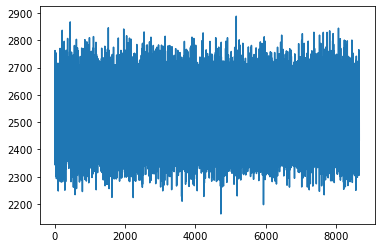

In [6]:
filename = "7D35d_100ns_md1_energy1-3-4.xvg"
time1a, bond1, proper_dihedrals1, improper_dihedrals1 = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time1a.append(float(t))
        bond1.append(float(b))
        proper_dihedrals1.append(float(p_d))
        improper_dihedrals1.append(float(i_d))
plt.plot(time1a, bond1)

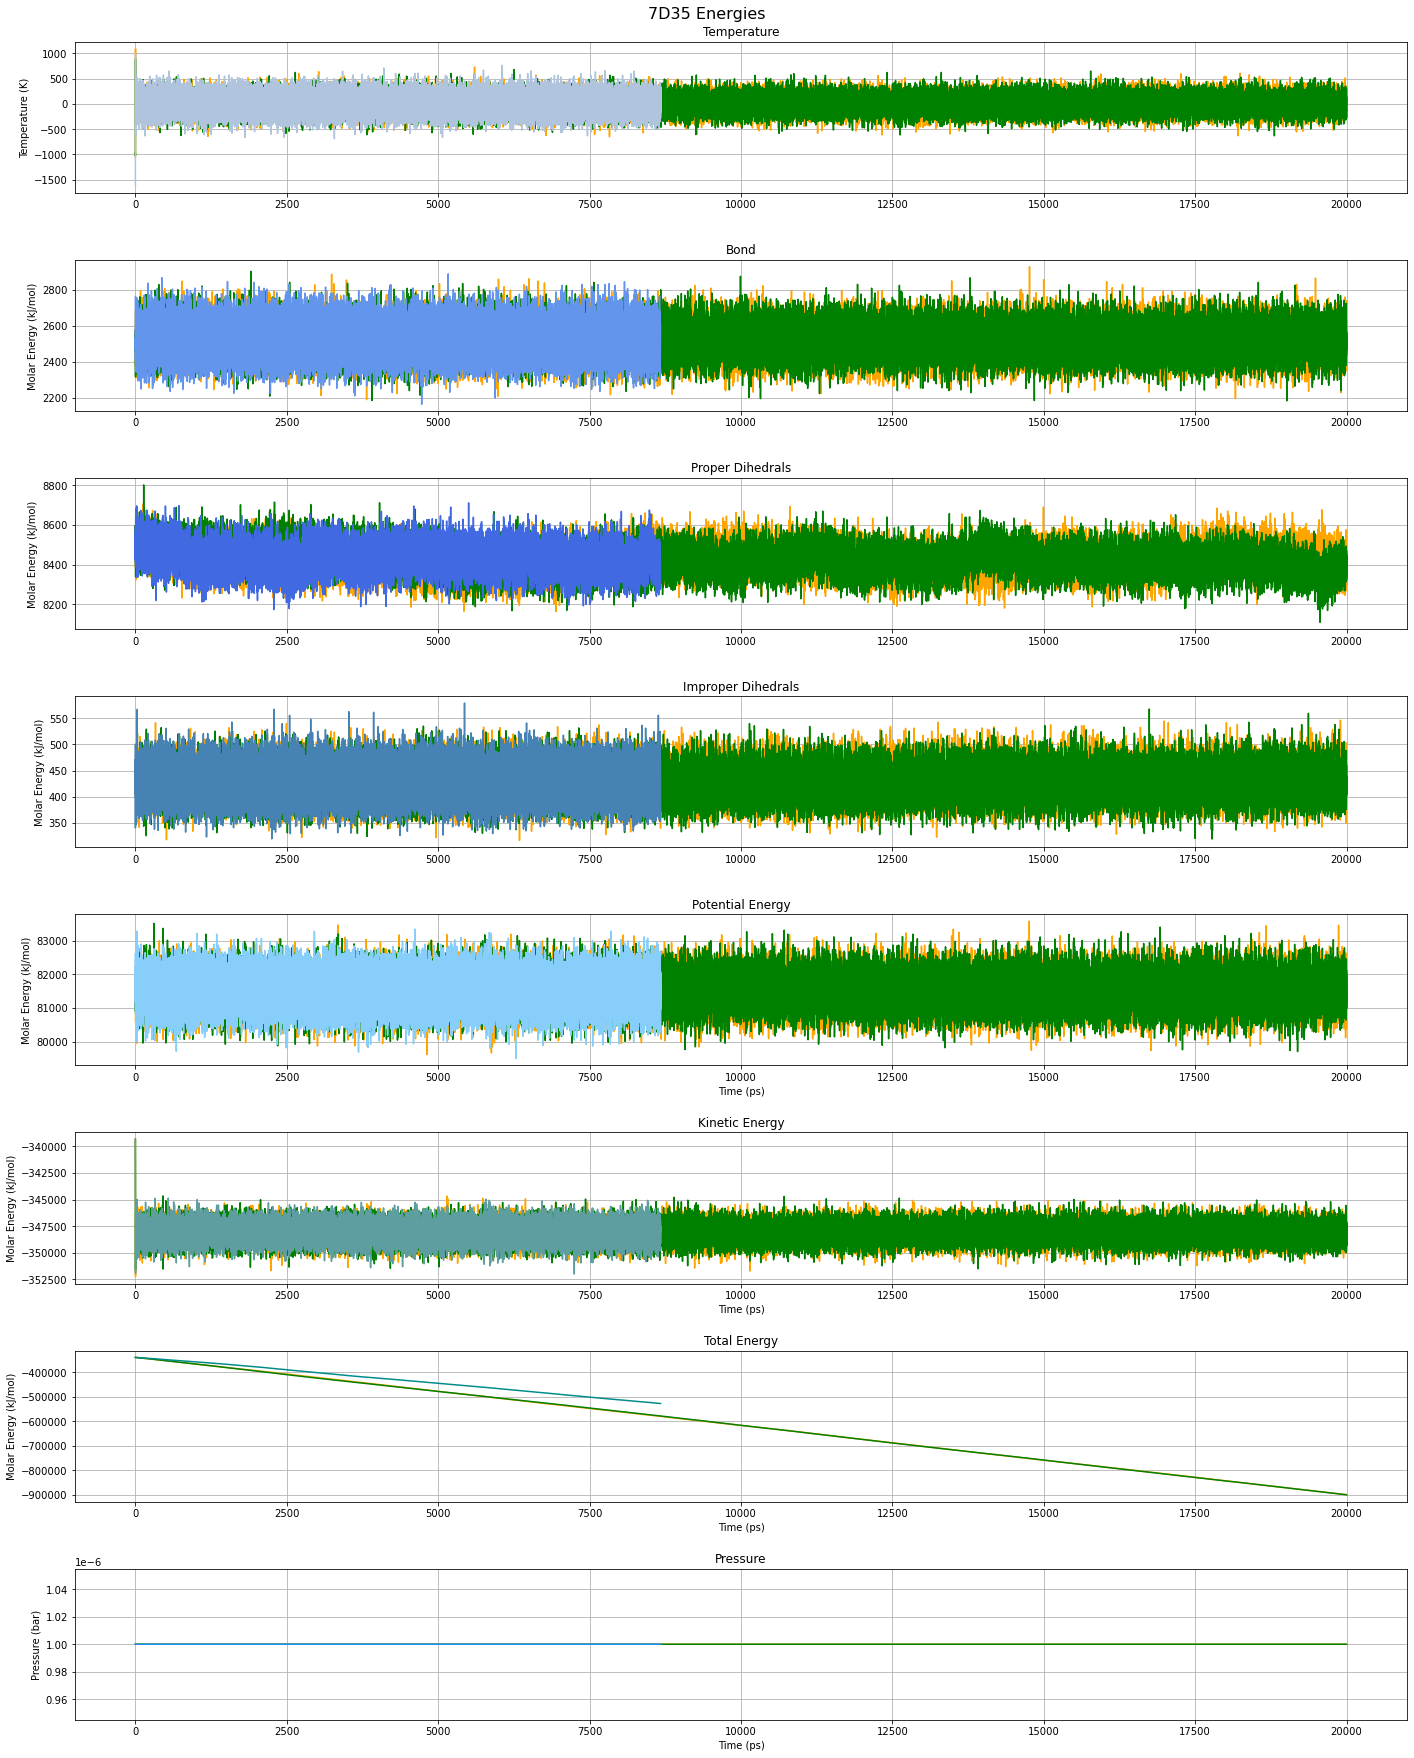

In [7]:
fig, axs = plt.subplots(8, figsize=(20,25))

axs[0].title.set_text('Temperature')
axs[0].plot(time2c, temperature2, 'orange')
axs[0].plot(time3c, temperature3, 'green')
axs[0].plot(time1c, temperature1, 'lightsteelblue')
axs[0].set_ylabel("Temperature (K)")
axs[0].grid()

# ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis
# ax2.set_ylabel("")  # we already handled the x-label with ax1
# ax2.plot(time, ###, "orange")

axs[1].title.set_text('Bond')
axs[1].plot(time2a, bond2, "orange")
axs[1].plot(time3a, bond3, "green")
axs[1].plot(time1a, bond1, "cornflowerblue")
axs[1].set_ylabel("Molar Energy (kJ/mol)")
axs[1].grid()

axs[2].title.set_text('Proper Dihedrals')
axs[2].plot(time2a, proper_dihedrals2, "orange")
axs[2].plot(time3a, proper_dihedrals3, "green")
axs[2].plot(time1a, proper_dihedrals1, "royalblue")
axs[2].set_ylabel("Molar Energy (kJ/mol)")
axs[2].grid()

axs[3].title.set_text('Improper Dihedrals')
axs[3].plot(time2a, improper_dihedrals2, "orange")
axs[3].plot(time3a, improper_dihedrals3, "green")
axs[3].plot(time1a, improper_dihedrals1, "steelblue")
axs[3].set_ylabel("Molar Energy (kJ/mol)")
axs[3].grid()

axs[4].title.set_text('Potential Energy')
axs[4].plot(time2b, potential2, "orange")
axs[4].plot(time3b, potential3, "green")
axs[4].plot(time1b, potential1, "lightskyblue")
axs[4].set_ylabel("Molar Energy (kJ/mol)")
axs[4].grid()
axs[4].set_xlabel("Time (ps)")

axs[5].title.set_text('Kinetic Energy')
axs[5].plot(time2b, kinetic2, "orange")
axs[5].plot(time3b, kinetic3, "green")
axs[5].plot(time1b, kinetic1, "cadetblue")
axs[5].set_ylabel("Molar Energy (kJ/mol)")
axs[5].grid()
axs[5].set_xlabel("Time (ps)")

axs[6].title.set_text('Total Energy')
axs[6].plot(time2b, total_energy2, "orange")
axs[6].plot(time3b, total_energy3, "green")
axs[6].plot(time1b, total_energy1, "darkcyan")
axs[6].set_ylabel("Molar Energy (kJ/mol)")
axs[6].grid()
axs[6].set_xlabel("Time (ps)")

axs[7].title.set_text('Pressure')
axs[7].plot(time2c, pressure2, "orange")
axs[7].plot(time3c, pressure3, "green")
axs[7].plot(time1c, pressure1, "dodgerblue")
axs[7].set_ylabel("Pressure (bar)")
axs[7].grid()

# axs[8].title.set_text('Constraint RMSD')
# axs[8].plot(time, constr_rmsd, "slategrey")
# axs[8].set_ylabel("")
# axs[8].grid()

axs[7].set_xlabel("Time (ps)")

fig.suptitle('7D35 Energies', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

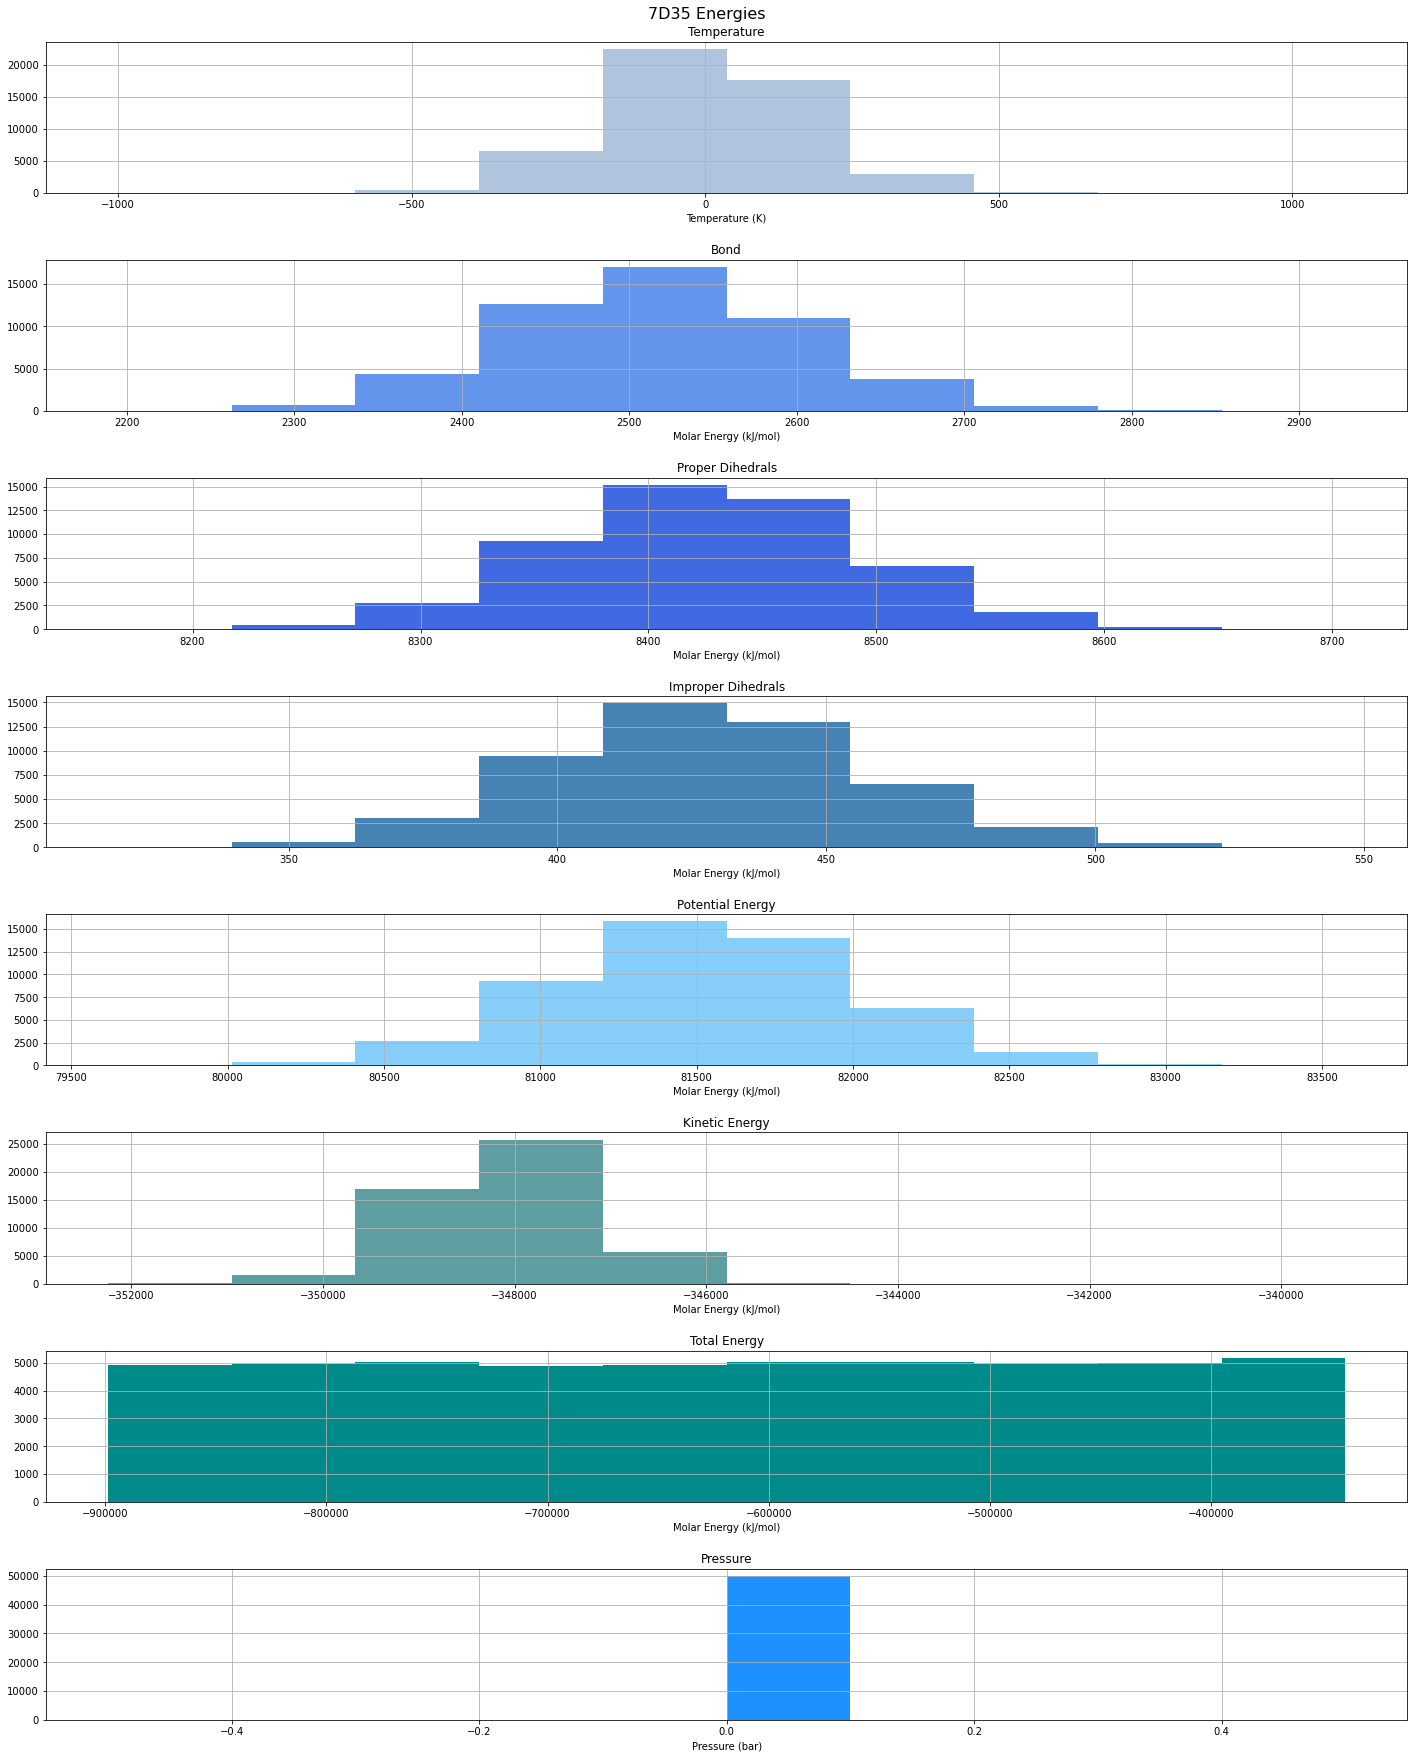

In [61]:
fig, axs = plt.subplots(8, figsize=(20,25))

axs[0].title.set_text('Temperature')
axs[0].hist(temperature2, color='lightsteelblue')
axs[0].set_xlabel("Temperature (K)")
axs[0].grid()

axs[1].title.set_text('Bond')
axs[1].hist(bond2, color="cornflowerblue")
axs[1].set_xlabel("Molar Energy (kJ/mol)")
axs[1].grid()

axs[2].title.set_text('Proper Dihedrals')
axs[2].hist(proper_dihedrals2, color="royalblue")
axs[2].set_xlabel("Molar Energy (kJ/mol)")
axs[2].grid()

axs[3].title.set_text('Improper Dihedrals')
axs[3].hist(improper_dihedrals2, color="steelblue")
axs[3].set_xlabel("Molar Energy (kJ/mol)")
axs[3].grid()

axs[4].title.set_text('Potential Energy')
axs[4].hist(potential2, color="lightskyblue")
axs[4].set_xlabel("Molar Energy (kJ/mol)")
axs[4].grid()

axs[5].title.set_text('Kinetic Energy')
axs[5].hist(kinetic2, color="cadetblue")
axs[5].set_xlabel("Molar Energy (kJ/mol)")
axs[5].grid()

axs[6].title.set_text('Total Energy')
axs[6].hist(total_energy2, color="darkcyan")
axs[6].set_xlabel("Molar Energy (kJ/mol)")
axs[6].grid()

axs[7].title.set_text('Pressure')
axs[7].hist(pressure2, color="dodgerblue")
axs[7].set_xlabel("Pressure (bar)")
axs[7].grid()

fig.suptitle('7D35 Energies', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

In [20]:
filename= "7D35d_100ns_md2_rmsd.xvg"
time1, rmsd = [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, r = line.split()
        time1.append(float(t))
        rmsd.append(float(r))
        
filename= "7D35d_100ns_md2_xtal.xvg"
time2, xtal_rmsd = [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, x = line.split()
        time2.append(float(t))
        xtal_rmsd.append(float(x))

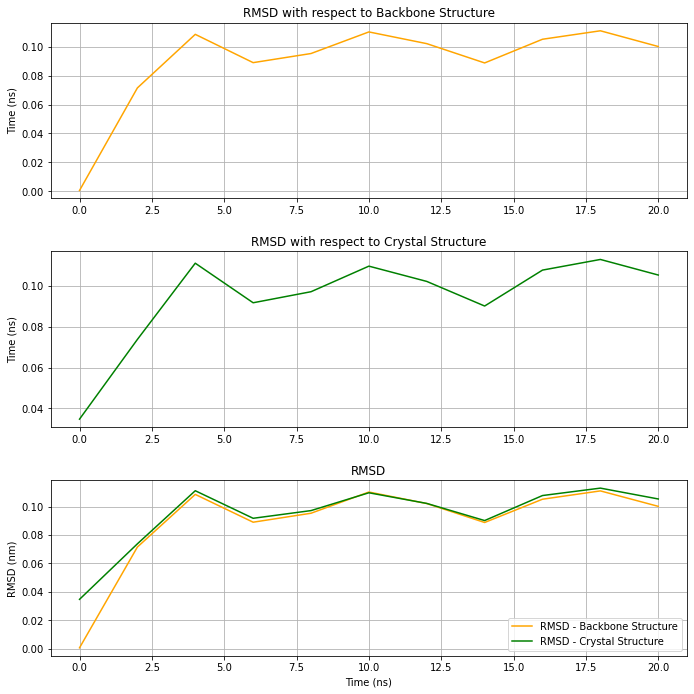

In [60]:
fig, axs = plt.subplots(3, figsize=(10,10))

axs[0].title.set_text('RMSD with respect to Backbone Structure')
axs[0].plot(time1, rmsd, 'orange')
axs[0].set_ylabel("RMSD (nm)")
axs[0].set_ylabel("Time (ns)")
axs[0].grid()

axs[1].title.set_text('RMSD with respect to Crystal Structure')
axs[1].plot(time2, xtal_rmsd, 'green')
axs[1].set_ylabel("RMSD (nm)")
axs[1].set_ylabel("Time (ns)")
axs[1].grid()

axs[2].title.set_text('RMSD')
axs[2].plot(time1, rmsd, 'orange', label="RMSD - Backbone Structure")
axs[2].plot(time2, xtal_rmsd, 'green',  label="RMSD - Crystal Structure")
axs[2].legend()
axs[2].set_ylabel("RMSD (nm)")
axs[2].set_xlabel("Time (ns)")
axs[2].grid()

plt.tight_layout(pad=2.0)
plt.show()

In [36]:
filename= "7D35d_100ns_md2_gyrate.xvg"
time, gyrate, x_coord, y_coord, z_coord = [], [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, rg, x, y, z = line.split()
        time.append(float(t))
        gyrate.append(float(rg))
        x_coord.append(float(x))
        y_coord.append(float(y))
        z_coord.append(float(z))

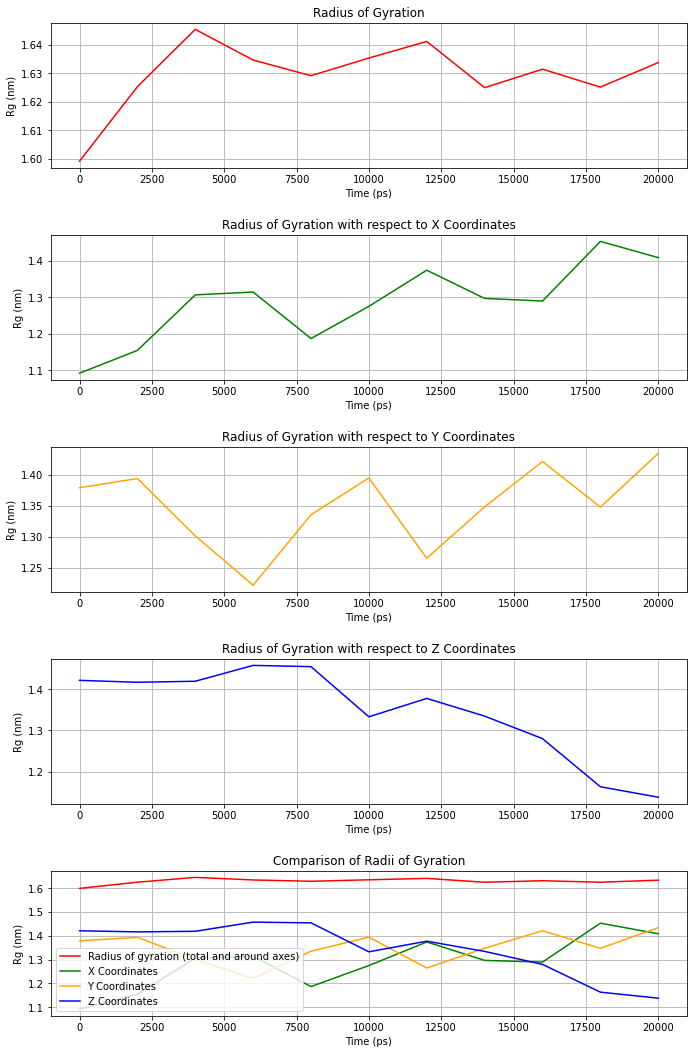

In [59]:
fig, axs = plt.subplots(5, figsize=(10,15))

axs[0].title.set_text('Radius of Gyration')
axs[0].plot(time, gyrate, 'red')
axs[0].set_ylabel("Rg (nm)")
axs[0].set_xlabel("Time (ps)")
axs[0].grid()

axs[1].title.set_text('Radius of Gyration with respect to X Coordinates')
axs[1].plot(time, x_coord, 'green')
axs[1].set_ylabel("Rg (nm)")
axs[1].set_xlabel("Time (ps)")
axs[1].grid()

axs[2].title.set_text('Radius of Gyration with respect to Y Coordinates')
axs[2].plot(time, y_coord, 'orange')
axs[2].set_ylabel("Rg (nm)")
axs[2].set_xlabel("Time (ps)")
axs[2].grid()

axs[3].title.set_text('Radius of Gyration with respect to Z Coordinates')
axs[3].plot(time, z_coord, 'blue')
axs[3].set_ylabel("Rg (nm)")
axs[3].set_xlabel("Time (ps)")
axs[3].grid()

axs[4].title.set_text('Comparison of Radii of Gyration')
axs[4].plot(time, gyrate, 'red', label="Radius of gyration (total and around axes)")
axs[4].plot(time, x_coord, 'green', label="X Coordinates")
axs[4].plot(time, y_coord, 'orange',  label="Y Coordinates")
axs[4].plot(time, z_coord, 'blue',  label="Z Coordinates")
axs[4].legend()
axs[4].set_xlabel("Time (ps)")
axs[4].set_ylabel("Rg (nm)")
axs[4].grid()

plt.tight_layout(pad=2.0)
plt.show()

In [47]:
### RMSF 
# topology and traj files to create universe 
protein1 = u1.select_atoms("protein")
protein2 = u2.select_atoms("protein")
protein3 = u3.select_atoms("protein")

# TODO: Need to center and make whole (this test trajectory
# contains the protein being split across periodic boundaries
# and the results will be WRONG!)

# Fit to the initial frame to get a better average structure
# (the trajectory is changed in memory)
prealigner1 = align.AlignTraj(u1, u1, select="protein and name CA", in_memory=True).run()
prealigner2 = align.AlignTraj(u2, u2, select="protein and name CA", in_memory=True).run()
prealigner3 = align.AlignTraj(u3, u3, select="protein and name CA", in_memory=True).run()


# ref = average structure
ref_coordinates1 = u1.trajectory.timeseries(asel=protein1).mean(axis=1)
ref_coordinates2 = u2.trajectory.timeseries(asel=protein2).mean(axis=1)
ref_coordinates3 = u3.trajectory.timeseries(asel=protein3).mean(axis=1)

# Make a reference structure (need to reshape into a
# 1-frame "trajectory").
ref1 = mda.Merge(protein1).load_new(ref_coordinates1[:, None, :], order="afc")
ref2 = mda.Merge(protein2).load_new(ref_coordinates2[:, None, :], order="afc")
ref3 = mda.Merge(protein3).load_new(ref_coordinates3[:, None, :], order="afc")

In [48]:
aligner1 = align.AlignTraj(u1, ref1, select="protein and name CA", in_memory=True).run()
aligner2 = align.AlignTraj(u2, ref2, select="protein and name CA", in_memory=True).run()
aligner3 = align.AlignTraj(u3, ref3, select="protein and name CA", in_memory=True).run()


# need to write the trajectory to disk for PMDA 0.3.0 (see issue #15)
with mda.Writer("rmsfit-test1.xtc", n_atoms=u1.atoms.n_atoms) as W:
    for ts in u1.trajectory:
        W.write(u1.atoms)
        
with mda.Writer("rmsfit-test2.xtc", n_atoms=u2.atoms.n_atoms) as W:
    for ts in u2.trajectory:
        W.write(u2.atoms)
        
with mda.Writer("rmsfit-test3.xtc", n_atoms=u3.atoms.n_atoms) as W:
    for ts in u3.trajectory:
        W.write(u3.atoms)

In [50]:
u1 = mda.Universe('7D35d_100ns_md1.tpr', "rmsfit-test1.xtc")
calphas1 = protein1.select_atoms("protein and name CA")
rmsfer1 = RMSF(calphas1).run()

u2 = mda.Universe('7D35d_100ns_md2.tpr', "rmsfit-test2.xtc")
calphas2 = protein2.select_atoms("protein and name CA")
rmsfer2 = RMSF(calphas2).run()

u3 = mda.Universe('7D35d_100ns_md3.tpr', "rmsfit-test3.xtc")
calphas3 = protein3.select_atoms("protein and name CA")
rmsfer3 = RMSF(calphas3).run()

C:\Users\19893\Anaconda3\envs\conda_md\lib\site-packages\MDAnalysis\analysis\rms.py:877: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\19893\Anaconda3\envs\conda_md\lib\site-packages\MDAnalysis\analysis\rms.py:877: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\19893\Anaconda3\envs\conda_md\lib\site-packages\MDAnalysis\analysis\rms.py:877: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\19893\Anaconda3\envs\conda_md\lib\site-packages\MDAnalysis\analysis\rms.py:877: DeprecationWarning: The `rmsf` attribute was deprecated in MDA

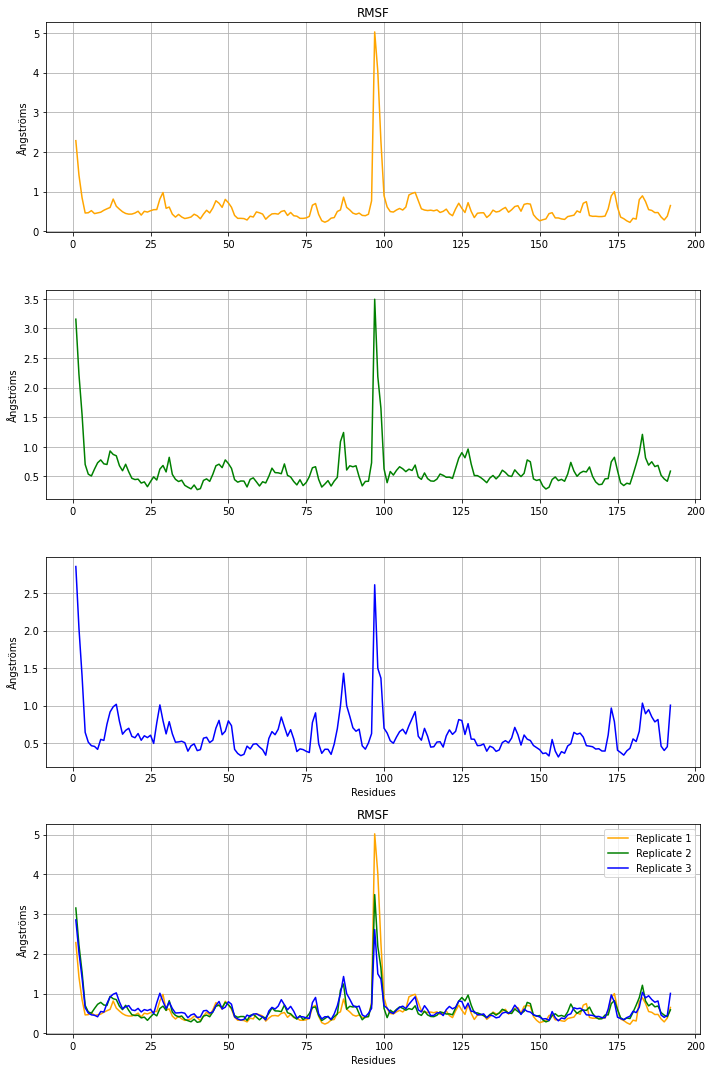

In [57]:
fig, axs = plt.subplots(4, figsize=(10,15))

axs[0].title.set_text('RMSF')
axs[0].plot(calphas1.resnums, rmsfer1.rmsf, color="orange", label="Replicate 1")
axs[0].set_ylabel("Ångströms")
axs[0].grid()

axs[1].plot(calphas2.resnums, rmsfer2.rmsf, color="green", label="Replicate 2")
axs[1].set_ylabel("Ångströms")
axs[1].grid()

axs[2].plot(calphas3.resnums, rmsfer3.rmsf, color="blue", label="Replicate 3")
axs[2].set_ylabel("Ångströms")
axs[2].set_xlabel("Residues")
axs[2].grid()
axs[3].set_xlabel("Residues")

axs[3].title.set_text('RMSF')
axs[3].plot(calphas1.resnums, rmsfer1.rmsf, color="orange", label="Replicate 1")
axs[3].plot(calphas2.resnums, rmsfer2.rmsf, color="green", label="Replicate 2")
axs[3].plot(calphas3.resnums, rmsfer3.rmsf, color="blue", label="Replicate 3")
axs[3].plot()
axs[3].set_ylabel("Ångströms")
axs[3].grid()
axs[3].set_xlabel("Residues")
plt.legend()

fig.tight_layout()
